# **Introduction**


# Welcome to the Journey of Sales Prediction

In this notebook, the focus will be on diving deep into the dataset to understand how different factors might affect future sales.

## 1. Defining the Problem

The notebook will begin by breaking down the problem itself:
- **What is being predicted?** 
- **Why do features like shop IDs, item categories, and prices matter?** 

The exploration will include how these features might influence sales in both subtle and overt ways.

## 2. Analyzing Sales Trends

Next, the analysis will zoom in on sales trends:
- **Daily Sales Data**: What do the numbers reveal?
- **Visualizations**: Plotting and understanding the distribution.
  - Are there spikes or outliers?
  - Do sales cluster around certain values, or is the distribution scattered?

## 3. Exploring Interactions

Once individual variables are understood, the investigation will turn to their interactions:
- **Price vs. Sales**: Does price drop when sales rise, or are there more complex relationships?
- **Time Trends**: Are there seasonal patterns or surprising changes over time?

## **Load Data**

In [1]:
import sys
sys.path.append('/kaggle/input/etl-module/')

In [2]:
# Import libraries : 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import  warnings 
from ETL import ETLPipeline

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Perform ETL to obtain data  : 


etl = ETLPipeline('/kaggle/input/forcasting-data','/kaggle/working/transformed.csv')
etl.run()

In [4]:
data = pd.read_csv('/kaggle/working/transformed.csv')

In [5]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,month,year
0,2013-01-01,0,2,991,99.0,1.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,Подарки - Развитие,"Адыгея ТЦ ""Мега""",1,2013
1,2013-01-01,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,"Адыгея ТЦ ""Мега""",1,2013
2,2013-01-01,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,"Адыгея ТЦ ""Мега""",1,2013
3,2013-01-01,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,"Адыгея ТЦ ""Мега""",1,2013
4,2013-01-01,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,"Адыгея ТЦ ""Мега""",1,2013


In [6]:
# Check how much missing value we have and find reason for it   : 

data.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
month                 0
year                  0
dtype: int64

# 1. Understanding the Problem:

## Sales Prediction Task

The goal is to train a model to **predict the number of specific products sold in specific shops for the next month.** Below are the key columns in the dataset that provide various information for the prediction task:

- **`date_block_num`**:  
  - A consecutive month number for convenience (e.g., January 2013 = 0, February 2013 = 1, ... October 2015 = 33).
  
- **`ID`**:  
  - An identifier representing a (Shop, Item) tuple within the test set.

- **`shop_id`**:  
  - Unique identifier for each shop.

- **`item_id`**:  
  - Unique identifier for each product.

- **`item_category_id`**:  
  - Unique identifier for the item category.

- **`item_cnt_day`**:  
  - The number of products sold on a specific day (monthly total is predicted).

- **`item_price`**:  
  - The current price of the item.

- **`item_name`**:  
  - The name of the product.

- **`shop_name`**:  
  - The name of the shop.

- **`item_category_name`**:  
  - The name of the product category.

---

### Categorical Features:
- `shop_id`: IDs for different shops.
- `item_id`: IDs for different items.
- `item_name`: Names of the items.
- `item_category_id`: IDs for different categories.
- `item_category_name`: Names of the item categories.
- `shop_name`: Names of the shops.
- `date`: While this is technically a date type, it can be considered categorical in some cases (such as for time-based features or to extract further time components like weekday, holiday, etc.).

### Numerical Features:
- `item_price`: The price of the item.
- `item_cnt_day`: The number of items sold per day.
- `date_block_num`: Represents a unique block of time (usually monthly in this dataset).
- `month`: Extracted month from the `date` column.
- `year`: Extracted year from the `date` column.

As we

# 2. Univariate Study

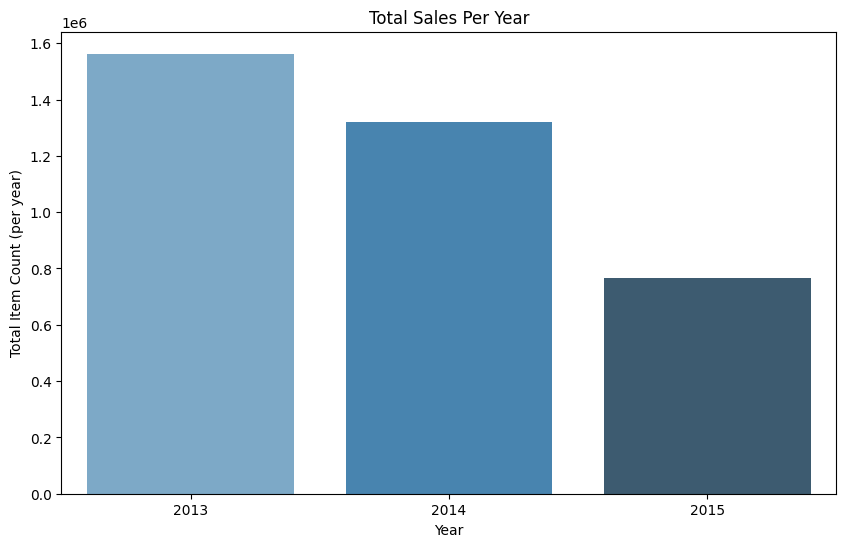

In [7]:
# Group by year and sum the item_cnt_day
yearly_sales = data.groupby('year')['item_cnt_day'].sum().reset_index()

# Plotting yearly sales
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='year', y='item_cnt_day', palette='Blues_d')
plt.title('Total Sales Per Year')
plt.ylabel('Total Item Count (per year)')
plt.xlabel('Year')
plt.show()

>***This graph represents that the overall amount of sales has decreased from 2013 to 2015.***

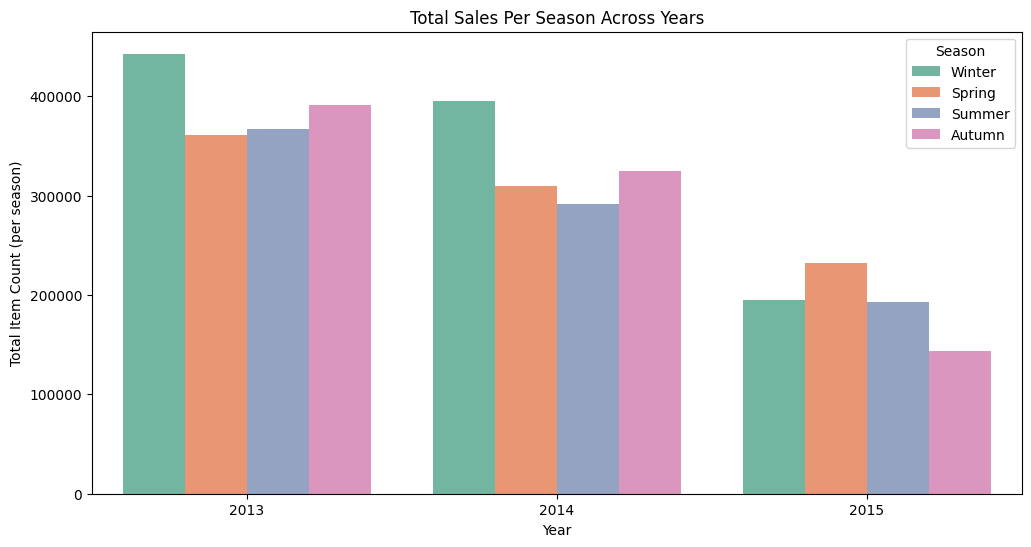

In [8]:
# Define seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['month'].apply(get_season)

# Group by year and season, then sum the item_cnt_day

seasonal_sales = data.groupby(['year', 'season'])['item_cnt_day'].sum().reset_index()
# Convert 'season' to a categorical type with the defined order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_sales['season'] = pd.Categorical(seasonal_sales['season'], categories=season_order, ordered=True)
seasonal_sales = seasonal_sales.sort_values(by=['year', 'season'])

# Plotting seasonal sales
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_sales, x='year', y='item_cnt_day', hue='season', palette='Set2')
plt.title('Total Sales Per Season Across Years')
plt.ylabel('Total Item Count (per season)')
plt.xlabel('Year')
plt.legend(title='Season')
plt.show()

>***The pattern of sales by season for 2013 and 2014 was somewhat similar, with winter having the highest sales. However, in 2015, the pattern changed, and spring recorded the highest sales.***

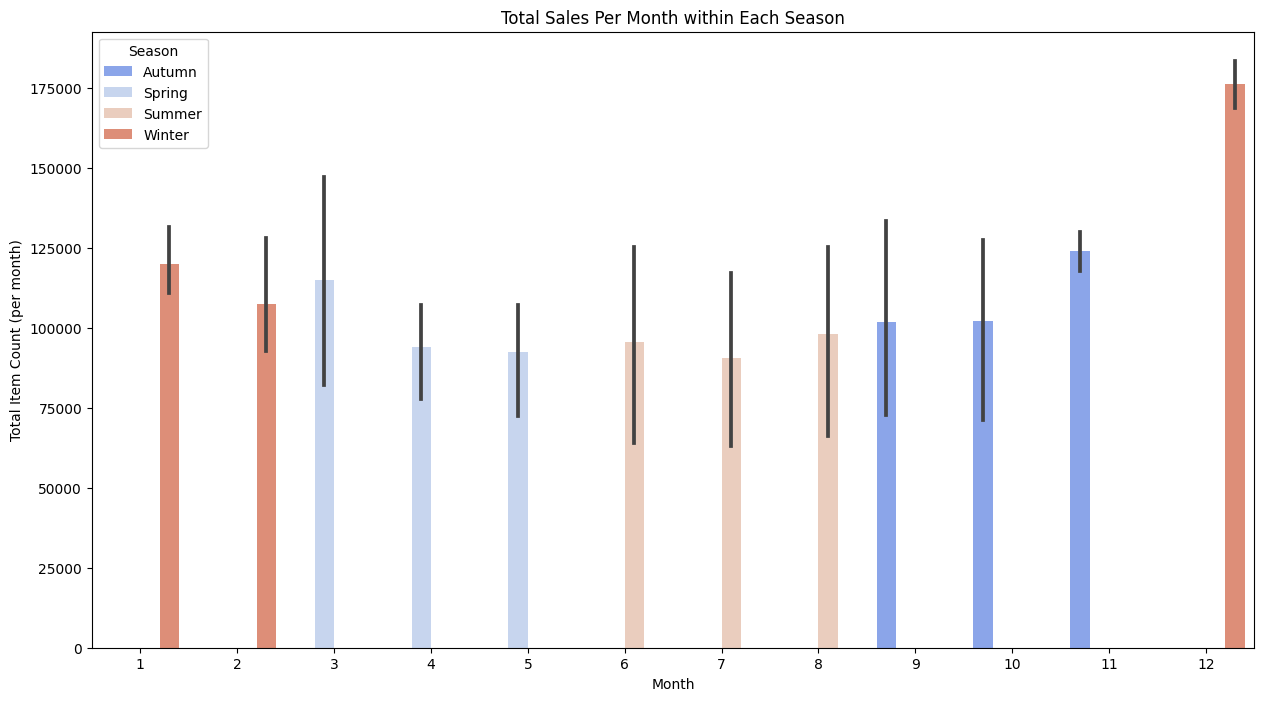

In [9]:
# Group by year, season, and month to sum item_cnt_day
monthly_sales = data.groupby(['year', 'season', 'month'])['item_cnt_day'].sum().reset_index()

# Plotting monthly sales within seasons
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_sales, x='month', y='item_cnt_day', hue='season', palette='coolwarm')
plt.title('Total Sales Per Month within Each Season')
plt.ylabel('Total Item Count (per month)')
plt.xlabel('Month')
plt.legend(title='Season')
plt.show()

>***As is evident, most of the sales occur in December, while sales are lowest in April and May. Generally, the amount of sales in winter and autumn is higher.***

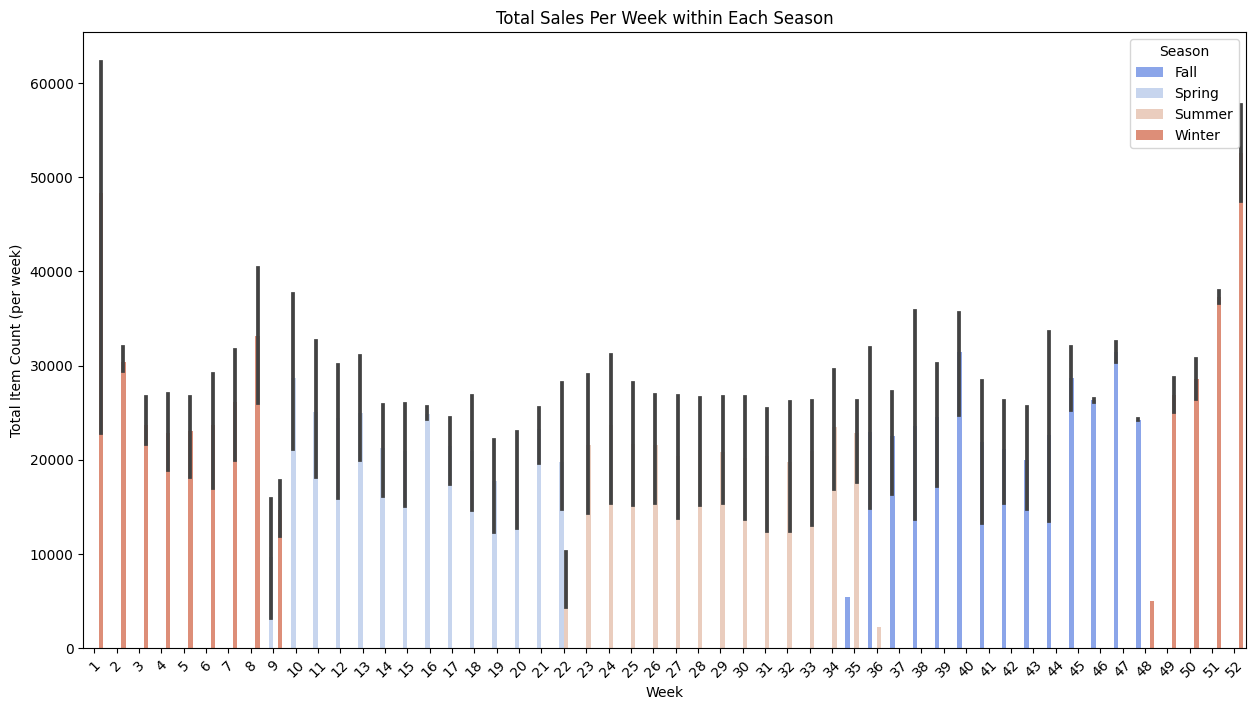

In [10]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['week'] = data['date'].dt.isocalendar().week
data['season'] = data['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                       ('Spring' if x in [3, 4, 5] else
                                        ('Summer' if x in [6, 7, 8] else 'Fall')))

# Group by year, season, and week, then sum item_cnt_day
weekly_sales = data.groupby(['year', 'season', 'week'])['item_cnt_day'].sum().reset_index()

# Plotting weekly sales within seasons
plt.figure(figsize=(15, 8))
sns.barplot(data=weekly_sales, x='week', y='item_cnt_day', hue='season', palette='coolwarm')
plt.title('Total Sales Per Week within Each Season')
plt.ylabel('Total Item Count (per week)')
plt.xlabel('Week')
plt.legend(title='Season')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

>***The distribution of sales among different weeks does not provide informative patterns. For instance, in the last week of the year, which falls in the last month, the amount of sales is higher than in other weeks. Additionally, there is notable variation in sales between different years during the first week.*** 

In [11]:
# Aggregate monthly sales
monthly_sales = data.groupby(['date_block_num', 'year', 'month'], as_index=False)['item_cnt_day'].sum()

# Set a date column for easier plotting later
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
monthly_sales.set_index('date', inplace=True)

# Rename column for clarity
monthly_sales.rename(columns={'item_cnt_day': 'total_sales'}, inplace=True)

# Display the first few rows of aggregated data
print(monthly_sales.head())


            date_block_num  year  month  total_sales
date                                                
2013-01-01               0  2013      1     131479.0
2013-02-01               1  2013      2     128090.0
2013-03-01               2  2013      3     147142.0
2013-04-01               3  2013      4     107190.0
2013-05-01               4  2013      5     106969.0


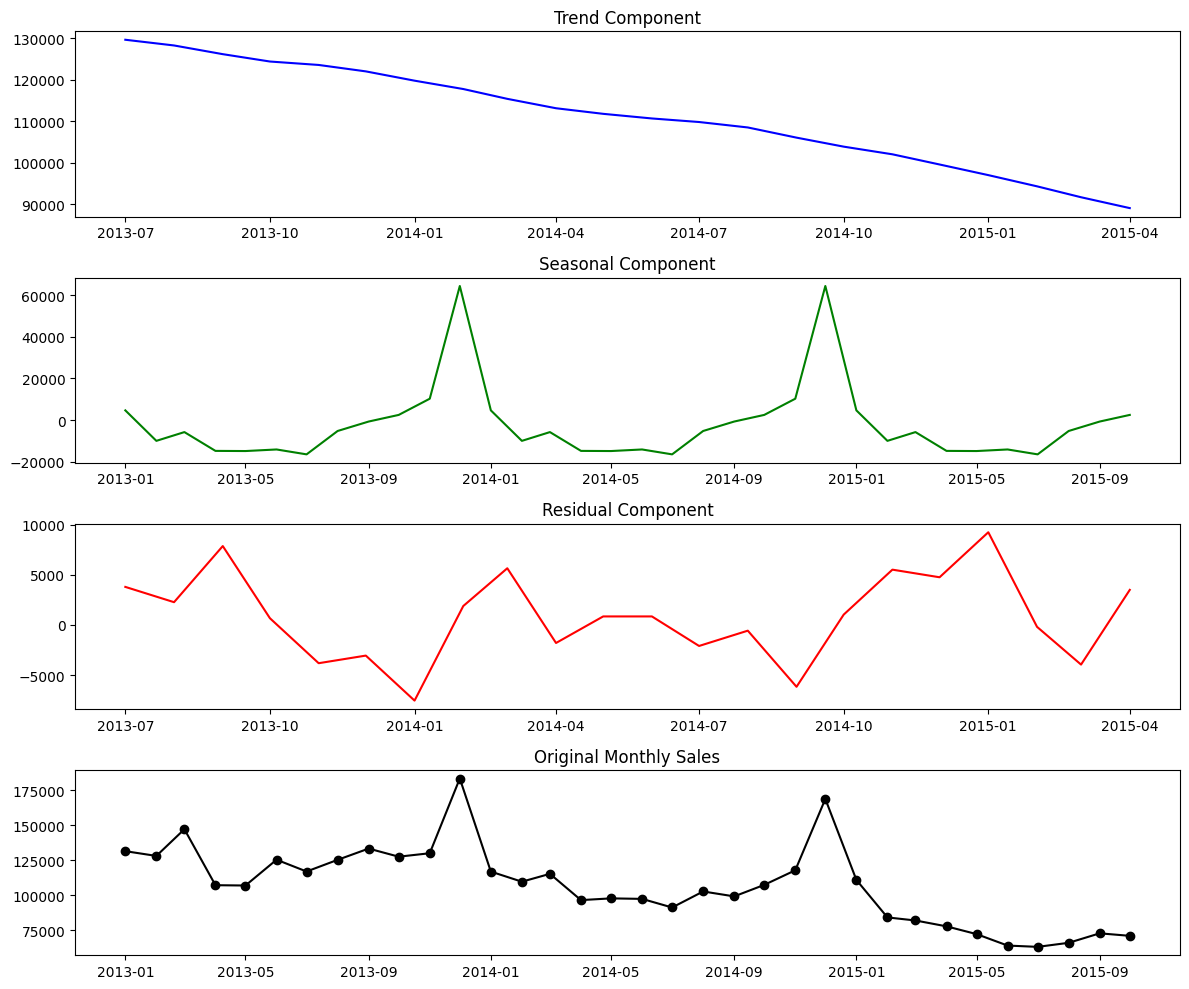

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the data is sorted by date

monthly_sales = monthly_sales.sort_index()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales['total_sales'], model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(monthly_sales.index, monthly_sales['total_sales'], marker='o', linestyle='-', label='Original', color='black')
plt.title('Original Monthly Sales')

plt.tight_layout()
plt.show()


### 1. **Trend Component (Top Panel)**:
- **Description**: The trend line shows a clear downward trajectory from approximately 130,000 to about 100,000.

### 2. **Seasonal Component (Middle Panel)**:
- **Description**: The seasonal component illustrates recurring peaks and troughs, notably around **January and September** of each year.

### 3. **Residual Component (Third Panel)**:
- **Description**: The residuals exhibit random fluctuations around zero, with some trends showing positive and negative deviations.

### 4. **Original Monthly Sales (Bottom Panel)**:
- **Description**: The original sales data shows significant variability, with a notable peak around January 2015, followed by a sharp drop.


# 3. Multivariate Study:

#### To visualize the changes in sales for each category, the original 84 item categories were consolidated into 10 main categories. This approach was taken to simplify visualization and analysis.

### *Main Categories*

1. Gaming
2. Movies
3. Books
4. Music
5. Gift Items
6. Software
7. Payment Cards
8. Services and Tickets
9. Storage Media
10. Batteries

In [13]:
category_clusters = {
    'Gaming': [
        'PC - Гарнитуры/Наушники',
        'Аксессуары - PS2',
        'Аксессуары - PS3',
        'Аксессуары - PS4',
        'Аксессуары - PSP',
        'Аксессуары - PSVita',
        'Аксессуары - XBOX 360',
        'Аксессуары - XBOX ONE',
        'Игровые консоли - PS2',
        'Игровые консоли - PS3',
        'Игровые консоли - PS4',
        'Игровые консоли - PSP',
        'Игровые консоли - PSVita',
        'Игровые консоли - XBOX 360',
        'Игровые консоли - XBOX ONE',
        'Игровые консоли - Прочие',
        'Игры - PS2',
        'Игры - PS3',
        'Игры - PS4',
        'Игры - PSP',
        'Игры - PSVita',
        'Игры - XBOX 360',
        'Игры - XBOX ONE',
        'Игры - Аксессуары для игр',
        'Игры Android - Цифра',
        'Игры MAC - Цифра',
        'Игры PC - Дополнительные издания',
        'Игры PC - Коллекционные издания',
        'Игры PC - Стандартные издания',
        'Игры PC - Цифра',
    ],
    'Movies': [
        'Кино - Blu-Ray',
        'Кино - Blu-Ray 3D',
        'Кино - Blu-Ray 4K',
        'Кино - DVD',
        'Кино - Коллекционное',
    ],
    'Books': [
        'Книги - Артбуки, энциклопедии',
        'Книги - Аудиокниги',
        'Книги - Аудиокниги (Цифра)',
        'Книги - Аудиокниги 1С',
        'Книги - Бизнес литература',
        'Книги - Комиксы, манга',
        'Книги - Компьютерная литература',
        'Книги - Методические материалы 1С',
        'Книги - Открытки',
        'Книги - Познавательная литература',
        'Книги - Путеводители',
        'Книги - Художественная литература',
        'Книги - Цифра',
    ],
    'Music': [
        'Музыка - CD локального производства',
        'Музыка - CD фирменного производства',
        'Музыка - MP3',
        'Музыка - Винил',
        'Музыка - Музыкальное видео',
        'Музыка - Подарочные издания',
    ],
    'Gift Items': [
        'Подарки - Атрибутика',
        'Подарки - Гаджеты, роботы, спорт',
        'Подарки - Мягкие игрушки',
        'Подарки - Настольные игры',
        'Подарки - Настольные игры (компактные)',
        'Подарки - Открытки, наклейки',
        'Подарки - Развитие',
        'Подарки - Сертификаты, услуги',
        'Подарки - Сувениры',
        'Подарки - Сувениры (в навеску)',
        'Подарки - Сумки, Альбомы, Коврики д/мыши',
        'Подарки - Фигурки',
    ],
    'Software': [
        'Программы - 1С:Предприятие 8',
        'Программы - MAC (Цифра)',
        'Программы - Для дома и офиса',
        'Программы - Для дома и офиса (Цифра)',
        'Программы - Обучающие',
        'Программы - Обучающие (Цифра)',
    ],
    'Payment Cards': [
        'Карты оплаты (Кино, Музыка, Игры)',
        'Карты оплаты - Live!',
        'Карты оплаты - Live! (Цифра)',
        'Карты оплаты - PSN',
        'Карты оплаты - Windows (Цифра)',
    ],
    'Services and Tickets': [
        'Билеты (Цифра)',
        'Доставка товара',
        'Служебные',
        'Служебные - Билеты',
    ],
    'Storage Media': [
        'Чистые носители (шпиль)',
        'Чистые носители (штучные)',
    ],
    'Batteries': [
        'Элементы питания',
    ]
}

**Note: The category_clusters dictionary was created with the assistance of ChatGPT to find similar clusters of items.**

In [14]:

def map_to_cluster(item_cat):
    for cluster, categories in category_clusters.items():
        if item_cat in categories:
            return cluster
    return 'Other'  # For categories not in any cluster

# Apply the function
data['cluster'] = data['item_category_name'].apply(map_to_cluster)

In [15]:
# Group by year, season, and cluster, then sum item_cnt_day
seasonal_cluster_sales = data.groupby(['year', 'season', 'cluster'])['item_cnt_day'].sum().reset_index()

# Convert 'season' to a categorical type with the defined order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_cluster_sales['season'] = pd.Categorical(seasonal_cluster_sales['season'], categories=season_order, ordered=True)
seasonal_cluster_sales = seasonal_cluster_sales.sort_values(by=['year', 'season', 'cluster'])

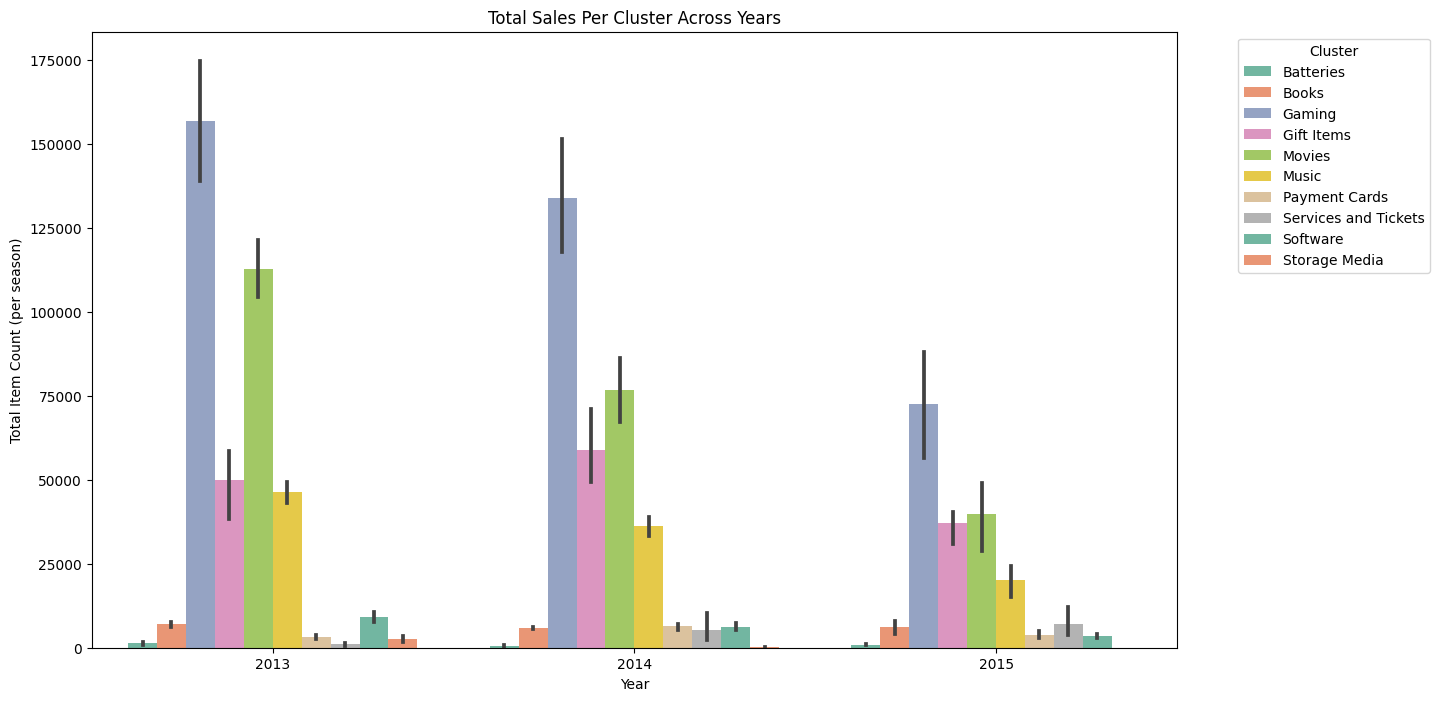

In [16]:
# Plotting seasonal sales by cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=seasonal_cluster_sales, x='year', y='item_cnt_day', hue='cluster', palette='Set2')
plt.title('Total Sales Per Cluster Across Years')
plt.ylabel('Total Item Count (per season)')
plt.xlabel('Year')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

>**This graph represents the total amount of sales for each category across different years.**

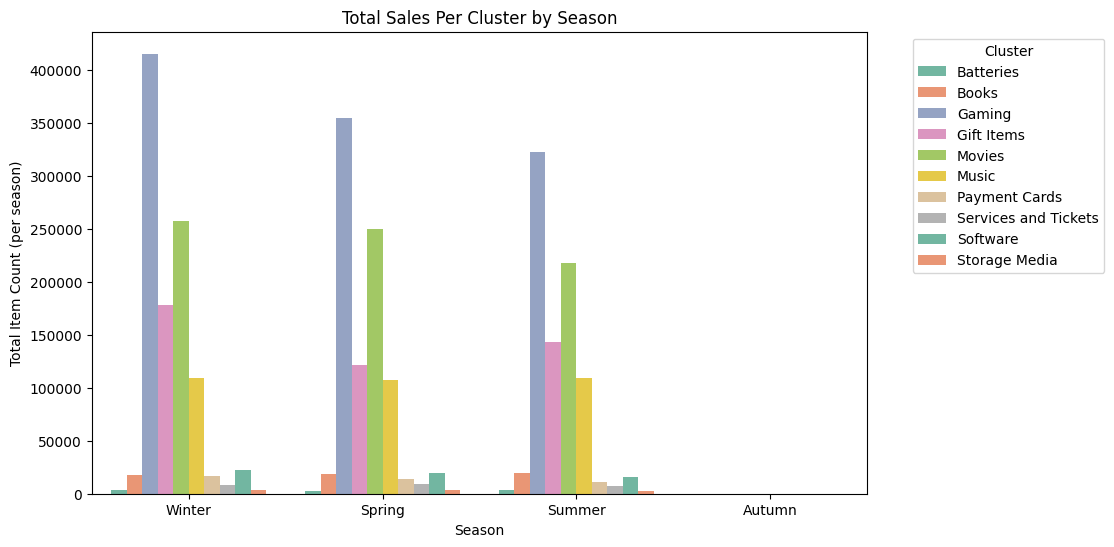

In [17]:
# Group by season and cluster, then sum item_cnt_day
seasonal_cluster_sales = data.groupby(['season', 'cluster'])['item_cnt_day'].sum().reset_index()

# Convert 'season' to a categorical type with the defined order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_cluster_sales['season'] = pd.Categorical(seasonal_cluster_sales['season'], categories=season_order, ordered=True)

# Plotting total sales per season by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_cluster_sales, x='season', y='item_cnt_day', hue='cluster', palette='Set2')
plt.title('Total Sales Per Cluster by Season')
plt.ylabel('Total Item Count (per season)')
plt.xlabel('Season')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### The graph represents the amount of sales for each category across different seasons. There are identifiable sales patterns for specific categories:



- **Gaming**, **Movies**, **Gift Items**, **Music**, **Books**, and **Software** are the top-selling categories in various seasons.

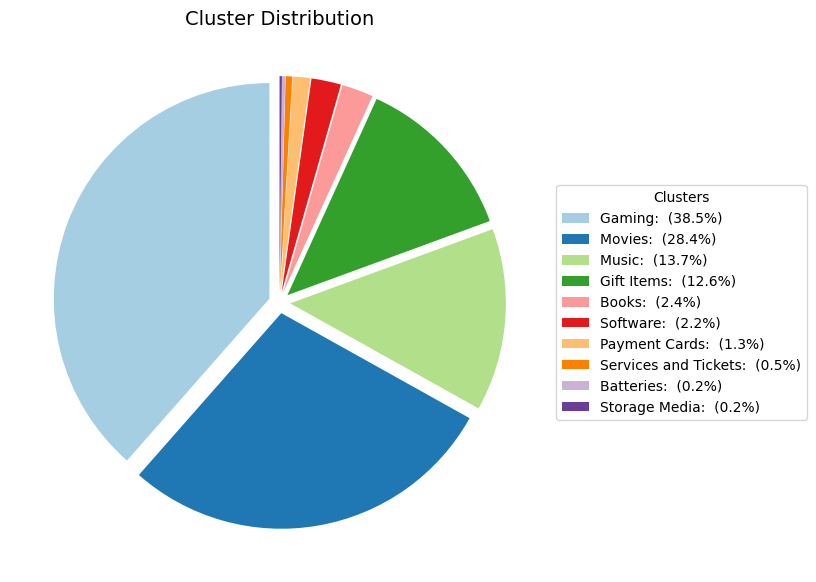

In [18]:
values = data['cluster'].value_counts()
labels = values.index

# Calculate percentages for the legend
percentages = 100 * values / values.sum()
legend_labels = [f'{label}:  ({percentage:.1f}%)' for label,  percentage in zip(labels, percentages)]

# Create the pie chart without labels inside
values.plot.pie(
    startangle=90,
    explode=[0.05]*len(values),  # Slightly explode each slice
    colors=plt.cm.Paired.colors,  # Set color map
    figsize=(7, 7),  # Adjust the figure size
    textprops={'fontsize': 12},  # Increase font size
    labels=None  # Hide labels inside the chart
)

# Add a legend with percentages
plt.legend(legend_labels, title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))

# Remove y-label for a cleaner look and add a title
plt.ylabel('')  
plt.title('Cluster Distribution', fontsize=14)

plt.show()

**In this pie chart, the distribution of different categories is examined in more detail.** For the top five categories, including **Gaming**, **Movies**, **Gift Items**, **Music**, **Books**, and **Software**, we will analyze the frequency of their sales for each month to gain some insights.

In [19]:
top_catagory = data[data['cluster'].isin(data['cluster'].value_counts().nlargest(6).index)]

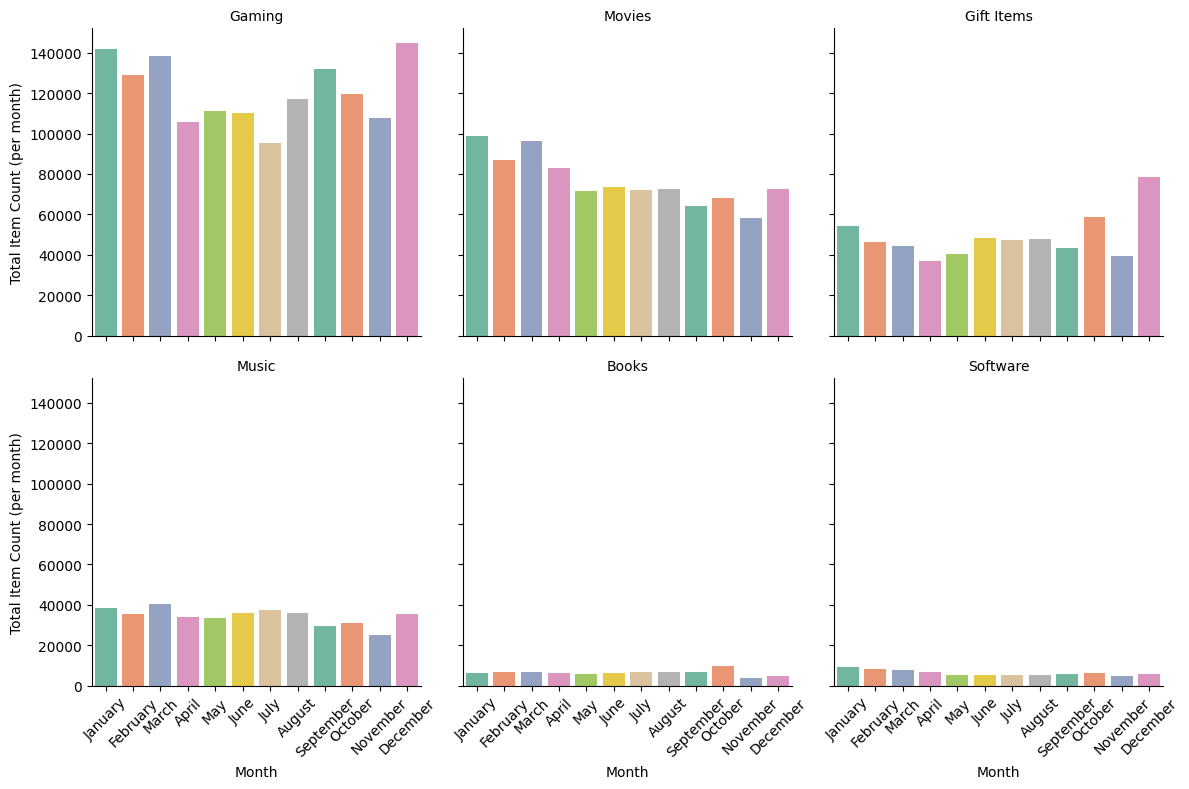

In [20]:
# Define the month order

month_mapping = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}

# Convert 'month' to a categorical type with defined order after grouping


# Group by month and item category, then sum item_cnt_day
top_catagory_monthly_sales = top_catagory.groupby(['month', 'cluster'])['item_cnt_day'].sum().reset_index()
top_catagory_monthly_sales['month'] = top_catagory_monthly_sales['month'].replace(month_mapping)

# Calculate total sales for each cluster
total_sales_per_cluster = top_catagory_monthly_sales.groupby('cluster')['item_cnt_day'].sum().reset_index()

# Sort the clusters based on total sales
sorted_clusters = total_sales_per_cluster.sort_values(by='item_cnt_day', ascending=False)['cluster']

# Create a FacetGrid to plot sales for each cluster, ordered by total sales
g = sns.FacetGrid(top_catagory_monthly_sales, col='cluster', col_order=sorted_clusters, col_wrap=3, height=4, sharey=True)
g.map(sns.barplot, 'month', 'item_cnt_day', palette='Set2')

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Total Item Count (per month)")

# Set x-ticks to the month names explicitly
for ax in g.axes.flatten():
    ax.set_xticks(range(len(month_mapping)))  # Set the ticks to the number of months
    ax.set_xticklabels(month_mapping.values(), rotation=45)  # Set the labels to the month names

# Show the plot
plt.tight_layout()
plt.show()

>***This graph represents the amount of sales for the top categories in different months throughout the data interval***

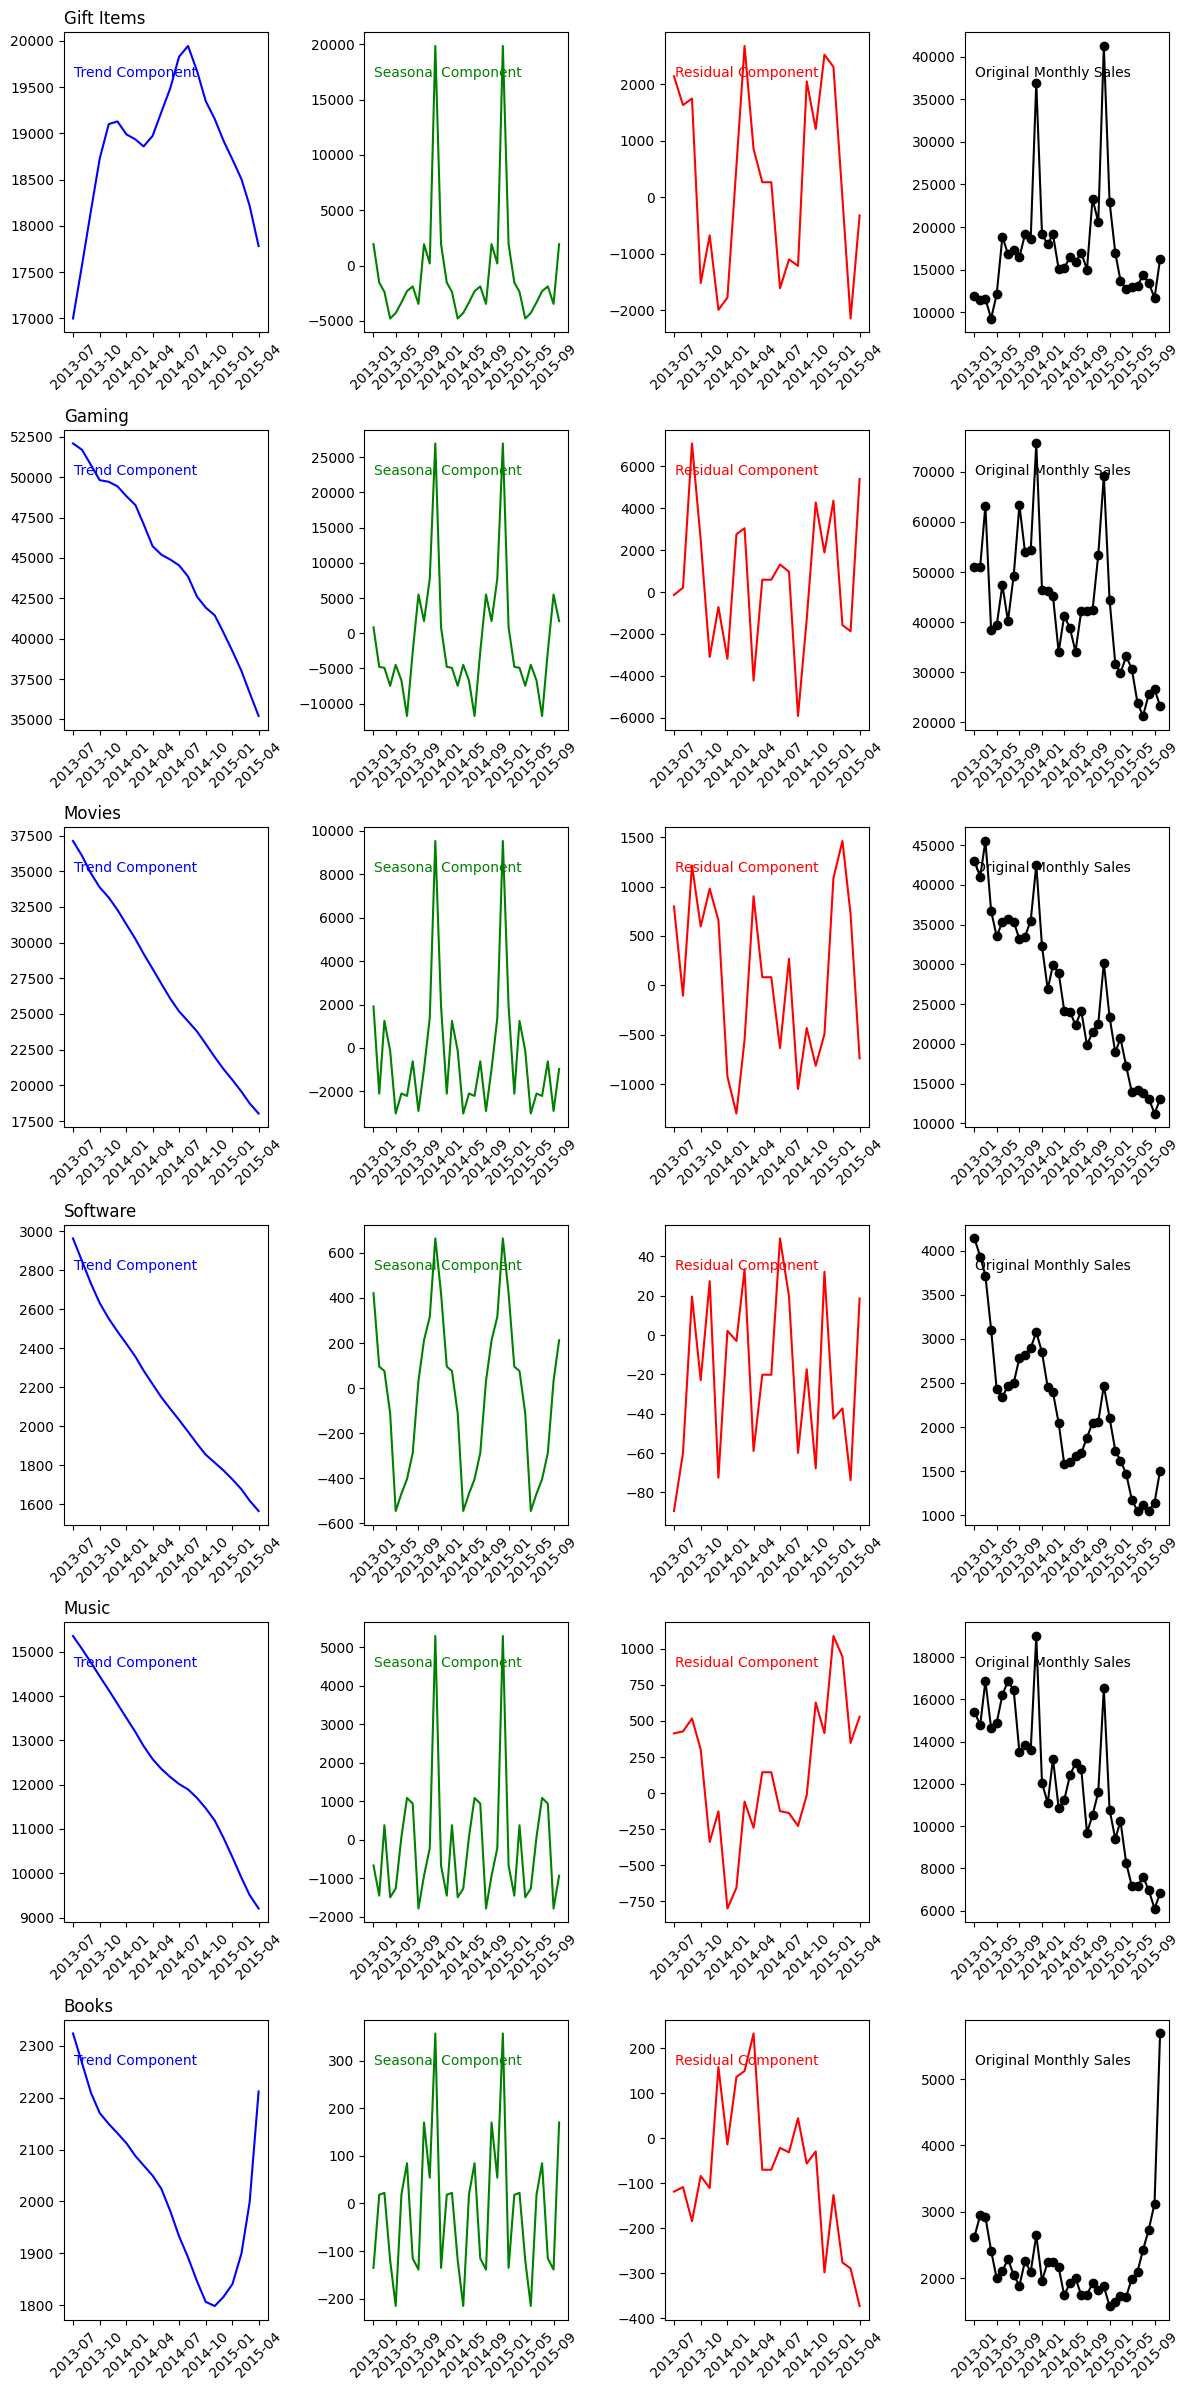

In [40]:
clusters = top_catagory['cluster'].unique()  # Get unique clusters

# Set up the plotting area
num_clusters = len(clusters)
plt.figure(figsize=(12, 4 * num_clusters))

for i, cluster in enumerate(clusters):
    # Aggregate monthly sales for the current cluster
    cluster_sales = top_catagory[top_catagory['cluster'] == cluster].groupby(['date_block_num', 'year', 'month'], as_index=False)['item_cnt_day'].sum()
    
    # Set a date column for easier plotting later
    cluster_sales['date'] = pd.to_datetime(cluster_sales[['year', 'month']].assign(day=1))
    cluster_sales.set_index('date', inplace=True)
    
    # Rename column for clarity
    cluster_sales.rename(columns={'item_cnt_day': 'total_sales'}, inplace=True)
    
    # Ensure the data is sorted by date
    cluster_sales = cluster_sales.sort_index()
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(cluster_sales['total_sales'], model='additive')
    
    # Plot the decomposition for the current cluster
    plt.subplot(num_clusters, 4, 4*i + 1)
    plt.plot(decomposition.trend, label='Trend', color='blue')
    plt.title(f'{cluster}', loc='left')
    plt.annotate('Trend Component', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='blue')
    plt.xticks(rotation=45)  # Ensure x-ticks are visible
    
    plt.subplot(num_clusters, 4, 4*i + 2)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.annotate('Seasonal Component', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='green')
    plt.xticks(rotation=45)
    
    plt.subplot(num_clusters, 4, 4*i + 3)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.annotate('Residual Component', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='red')
    plt.xticks(rotation=45)
    
    plt.subplot(num_clusters, 4, 4*i + 4)
    plt.plot(cluster_sales.index, cluster_sales['total_sales'], marker='o', linestyle='-', label='Original', color='black')
    plt.annotate('Original Monthly Sales', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


>Based on the seasonal decomposition graph for the top category, it can be observed that most categories, except for **Books** and **Gift items**, show a negative trend over time.

- **December**: The most significant peak across the graphs appears at the end of the year, likely corresponding to the holiday season.
- **January/February**: A smaller peak is seen at the beginning of the year, which may be tied to post-holiday sales or New Year's promotions.


In [21]:
data.shop_name.sample(n=10)

2766344     Москва ТЦ "МЕГА Белая Дача II"
921648                    Уфа ТЦ "Семья" 2
769933              СПб ТК "Невский Центр"
2654475               Уфа ТК "Центральный"
1757921                Самара ТЦ "Мелодия"
1713612                    СПб ТК "Сенная"
1151814      !Якутск Орджоникидзе, 56 фран
1277640    Москва ТЦ "МЕГА Теплый Стан" II
1180480             Ярославль ТЦ "Альтаир"
1007869         Воронеж (Плехановская, 13)
Name: shop_name, dtype: object

>***The shop name typically begins with the name of a city, which needs to be extracted for further analysis.***

In [22]:
# Optimized function to extract city and shop name
def extract_city_shop_optimized(df: pd.DataFrame):
    # Remove leading '!' if present
    df['clean_name'] = df['shop_name'].str.lstrip('!')
    
    # Extract city (everything before the first space)
    df['city'] = df['clean_name'].str.split().str[0]
    
    # Extract shop (everything after the city)
    df['shop'] = df['clean_name'].str.split(n=1).str[1].fillna('')
    
    # Clean up
    df = df.drop('clean_name', axis=1)
    
    return df

In [23]:
data = extract_city_shop_optimized(data)

# Item_cnt vs City

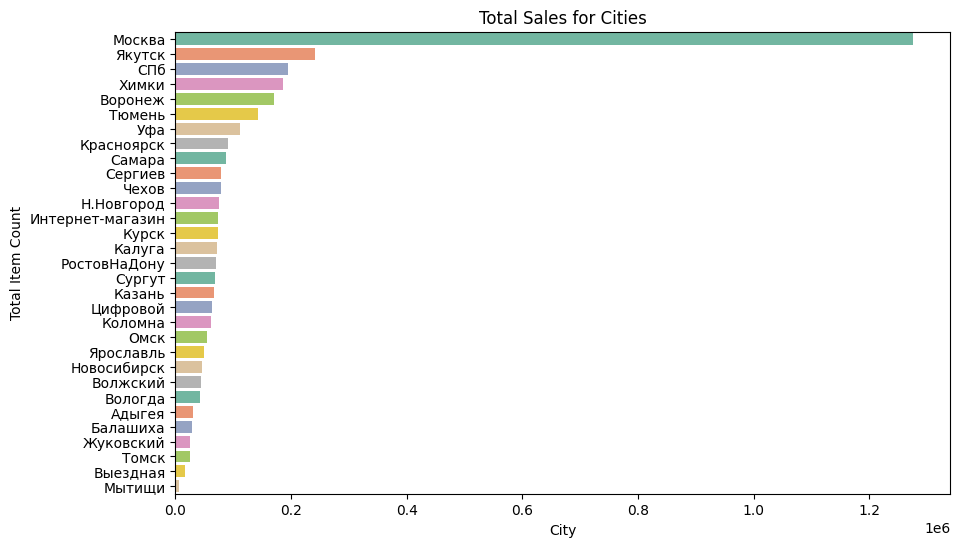

In [24]:
# Group by season and cluster, then sum item_cnt_day
city_sales = data.groupby('city')['item_cnt_day'].sum().reset_index()

# Convert 'season' to a categorical type with the defined order
city_sales = city_sales.sort_values('item_cnt_day', ascending= False)

# Plotting total sales per season by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=city_sales, y='city', x='item_cnt_day', palette='Set2')
plt.title('Total Sales for Cities')
plt.ylabel('Total Item Count')
plt.xlabel('City')

plt.show()

In [25]:
# Get the top 5 cities based on item_cnt_day
top_5_cities = city_sales.nlargest(5, 'item_cnt_day')

print(top_5_cities)

       city  item_cnt_day
13   Москва     1276375.0
29   Якутск      240857.0
19      СПб      195542.0
26    Химки      185790.0
4   Воронеж      171142.0


***As can be seen, the cities include Москва, Якутск, СПб, Химки, and Воронеж , have the most sells .***

### Top Category vs City

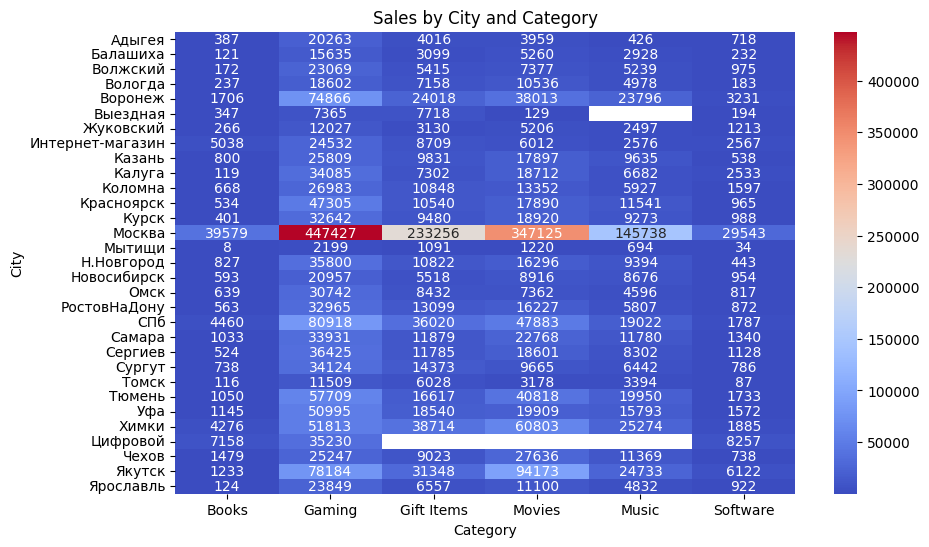

In [26]:
top_catagory = data[data['cluster'].isin(data['cluster'].value_counts().nlargest(6).index)]
# Step 1: Aggregate sales by city and category
df_cat_city_sale = top_catagory.groupby(['city', 'cluster'])['item_cnt_day'].sum().reset_index()

# Step 2: Create a pivot table for heatmap
pivot_table = df_cat_city_sale.pivot(index= 'city', columns='cluster', values='item_cnt_day')

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size for better clarity
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="g")
plt.title('Sales by City and Category')
plt.xlabel('Category')
plt.ylabel('City')
plt.show()

>***This graph represents the quantity of items sold for each of the top categories.***

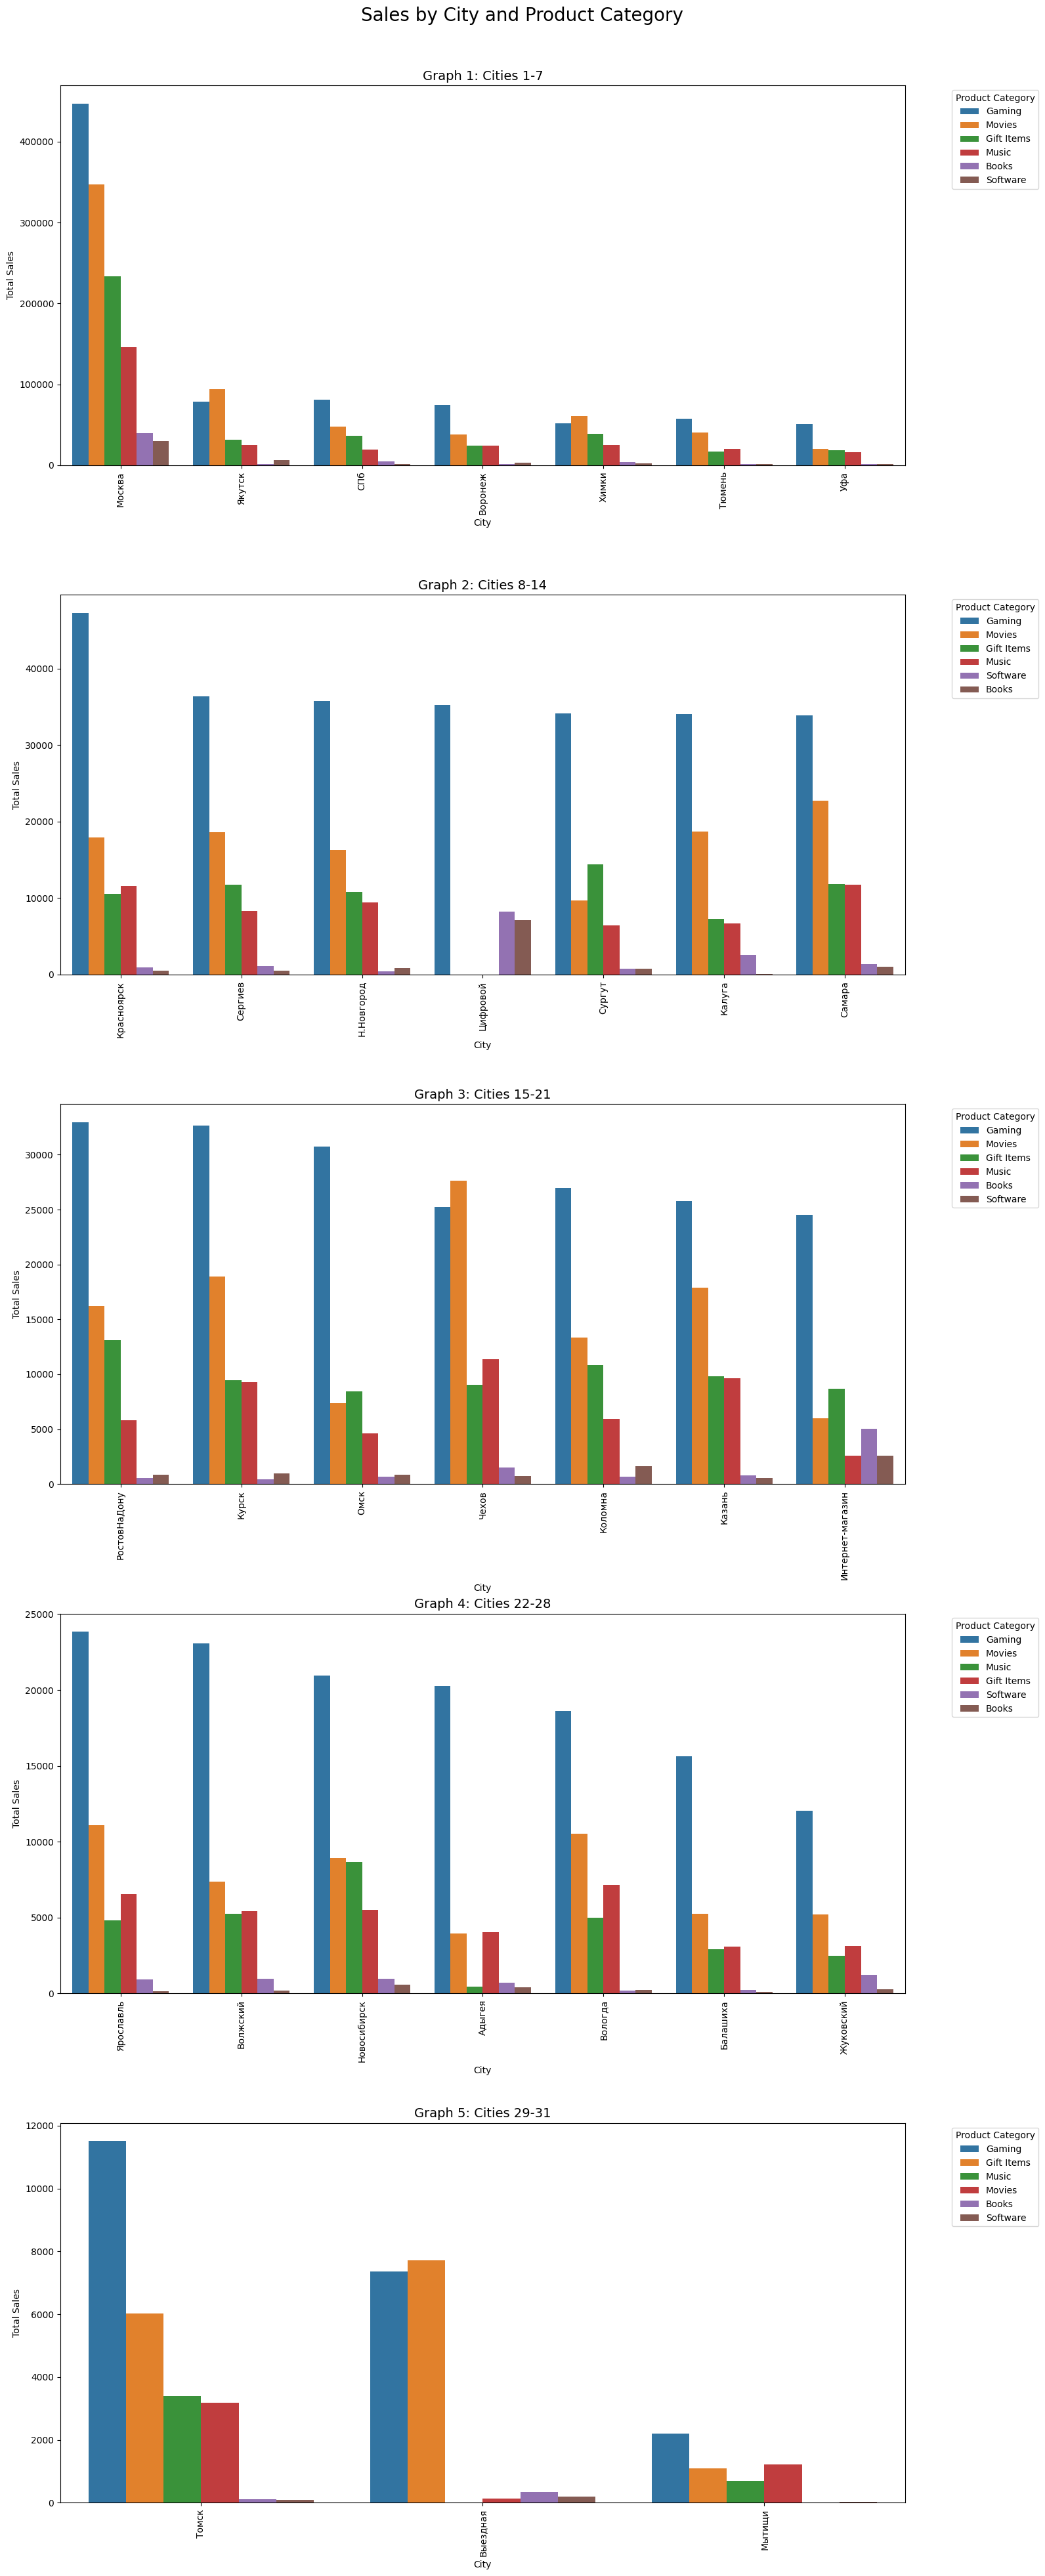

In [27]:
df_cat_city_sale = df_cat_city_sale.sort_values(by='item_cnt_day', ascending=False)

# Get unique cities and calculate number of cities per graph
cities = df_cat_city_sale['city'].unique()
cities_per_graph = len(cities) // 5 + (1 if len(cities) % 5 != 0 else 0)

# Create 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(16, 40))
fig.suptitle('Sales by City and Product Category', fontsize=20)

for i in range(5):
    # Select subset of cities for this graph
    start_idx = i * cities_per_graph
    end_idx = (i + 1) * cities_per_graph
    subset_cities = cities[start_idx:end_idx]
    
    # Filter data for these cities
    subset_data = df_cat_city_sale[df_cat_city_sale['city'].isin(subset_cities)]
    
    # Create the bar plot
    sns.barplot(data=subset_data, x='city', y='item_cnt_day', hue='cluster', ax=axes[i])
    
    axes[i].set_title(f'Graph {i+1}: Cities {start_idx+1}-{min(end_idx, len(cities))}', fontsize=14)
    axes[i].set_xlabel('City', fontsize=10)
    axes[i].set_ylabel('Total Sales', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    
    # Adjust legend
    axes[i].legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make room for suptitle
plt.show()

>***These graphs provide a closer view of each city and the sales amounts for each category. It can be observed that gaming, gift items, and music have the highest sales figures.***

### Shop vs Item_cnt

In [28]:
data.shop


0             ТЦ "Мега"
1             ТЦ "Мега"
2             ТЦ "Мега"
3             ТЦ "Мега"
4             ТЦ "Мега"
               ...     
2935837    ТЦ "Альтаир"
2935838    ТЦ "Альтаир"
2935839    ТЦ "Альтаир"
2935840    ТЦ "Альтаир"
2935841    ТЦ "Альтаир"
Name: shop, Length: 2935842, dtype: object

In [29]:
set(data.shop
)

{'"Распродажа"',
 '(Плехановская, 13)',
 'МТРЦ "Афи Молл"',
 'Магазин С21',
 'Орджоникидзе, 56',
 'Орджоникидзе, 56 фран',
 'Посад ТЦ "7Я"',
 'ТК "Буденовский" (пав.А2)',
 'ТК "Буденовский" (пав.К7)',
 'ТК "Невский Центр"',
 'ТК "Сенная"',
 'ТК "Центральный"',
 'ТРК "XL-3"',
 'ТРК "Атриум"',
 'ТРК "Мегацентр Горизонт"',
 'ТРК "Мегацентр Горизонт" Островной',
 'ТРК "Октябрь-Киномир"',
 'ТРЦ "XXI век"',
 'ТРЦ "Галерея Новосибирск"',
 'ТРЦ "Изумрудный Город"',
 'ТРЦ "Карнавал"',
 'ТРЦ "Кристалл"',
 'ТРЦ "Максимир"',
 'ТРЦ "Мармелад"',
 'ТРЦ "РИО"',
 'ТРЦ "Сити Молл"',
 'ТРЦ "Фантастика"',
 'ТРЦ Сити-Парк "Град"',
 'ТЦ "Альтаир"',
 'ТЦ "Ареал" (Беляево)',
 'ТЦ "Бехетле"',
 'ТЦ "Взлетка Плаза"',
 'ТЦ "Волга Молл"',
 'ТЦ "Гудвин"',
 'ТЦ "Зеленый Берег"',
 'ТЦ "Июнь"',
 'ТЦ "МЕГА Белая Дача II"',
 'ТЦ "МЕГА Теплый Стан" II',
 'ТЦ "Мега"',
 'ТЦ "Мелодия"',
 'ТЦ "Новый век" (Новокосино)',
 'ТЦ "ПаркХаус"',
 'ТЦ "ПаркХаус" II',
 'ТЦ "Перловский"',
 'ТЦ "Пушкинский"',
 'ТЦ "Рио"',
 'ТЦ "Семеновск

>***Many shops are categorized as:***

- ТЦ (Торговый Центр): Shopping centers like "ТЦ 'Альтаир'" and "ТЦ 'МЕГА Теплый Стан II'".
- ТРК (Торгово-Развлекательный Комплекс): Shopping and entertainment complexes, e.g., "ТРК 'Атриум'" and - "ТРК 'Мегацентр Горизонт'".
- ТРЦ (Торгово-Развлекательный Центр): Entertainment shopping centers like "ТРЦ 'Галерея Новосибирск'" and "ТРЦ 'РИО'".

In [30]:
# Define the mapping of shop names to their English types
shop_type_mapping = {
    'ТЦ "Центральный"': 'Shopping Center (SC)',
    'ТЦ "Мега"': 'Shopping Center (SC)',
    'ТЦ "Альтаир"': 'Shopping Center (SC)',
    'ТЦ "Июнь"': 'Shopping Center (SC)',
    'ТЦ "Гудвин"': 'Shopping Center (SC)',
    'ТЦ "Зеленый Берег"': 'Shopping Center (SC)',
    'ТЦ "Бехетле"': 'Shopping Center (SC)',
    'ТЦ "Новый век" (Новокосино)': 'Shopping Center (SC)',
    'ТЦ "МЕГА Белая Дача II"': 'Shopping Center (SC)',
    'ТЦ "МЕГА Теплый Стан" II': 'Shopping Center (SC)',
    'ТЦ "ПаркХаус"': 'Shopping Center (SC)',
    'ТЦ "ПаркХаус" II': 'Shopping Center (SC)',
    'ТЦ "Семеновский"': 'Shopping Center (SC)',
    'ТЦ "Семья" 2': 'Shopping Center (SC)',
    'ТЦ "Серебряный Дом"': 'Shopping Center (SC)',
    'ТЦ "Взлетка Плаза"': 'Shopping Center (SC)',
    'ТЦ "Волга Молл"': 'Shopping Center (SC)',
    'ТЦ "Пушкинский"': 'Shopping Center (SC)',
    'ТЦ "Рио"': 'Shopping Center (SC)',
    'ТРК "Атриум"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Октябрь-Киномир"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Мегацентр Горизонт"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Мегацентр Горизонт" Островной': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Сити Молл"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Фантастика"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "РИО"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Галерея Новосибирск"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Кристалл"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "Мармелад"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "XL-3"': 'Shopping and Entertainment Complex (SEC)',
    'ТРК "XXI век"': 'Shopping and Entertainment Complex (SEC)',
    'ТРЦ "Карнавал"': 'Shopping and Entertainment Center (SEC)',
    'ТРЦ "Максимир"': 'Shopping and Entertainment Center (SEC)',
    'ТРЦ "Изумрудный Город"': 'Shopping and Entertainment Center (SEC)',
    'ТРЦ "Сити-Парк" "Град"': 'Shopping and Entertainment Center (SEC)',
    'ТРЦ "Мега"': 'Shopping and Entertainment Center (SEC)',
}

# Add a new column for shop type
data['shop_type'] = data['shop'].map(shop_type_mapping)

>**Note: The Shop_type dictionary was created with the assistance of ChatGPT to find similar type of shops.**

In [31]:
data.shop_type.value_counts()

shop_type
Shopping Center (SC)                        1435327
Shopping and Entertainment Complex (SEC)     234359
Shopping and Entertainment Center (SEC)      149261
Name: count, dtype: int64

### Shop type vs Item_cnt

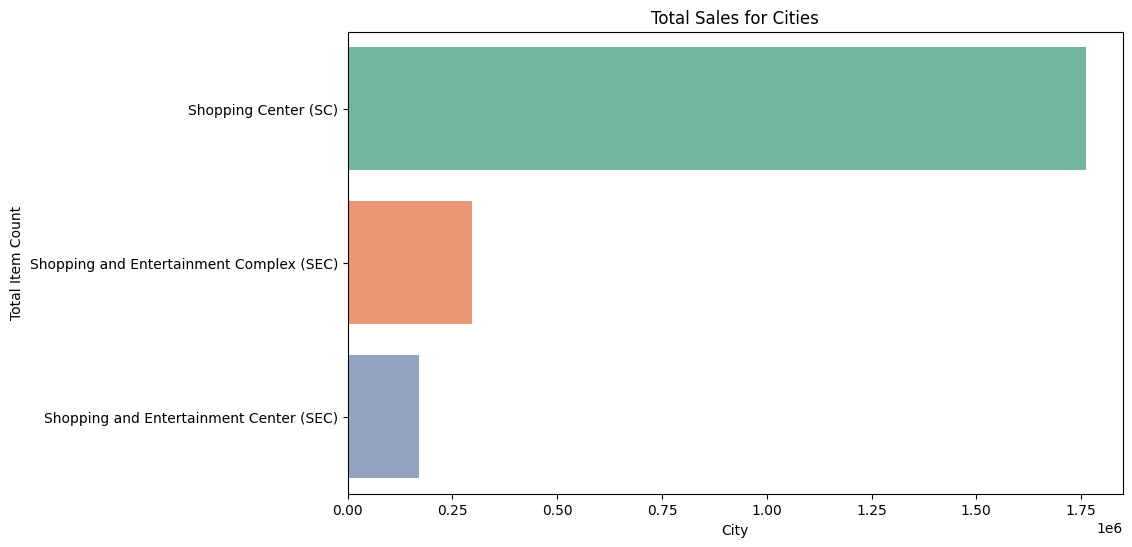

In [32]:
# Group by season and cluster, then sum item_cnt_day
city_sales = data.groupby('shop_type')['item_cnt_day'].sum().reset_index()

# Convert 'season' to a categorical type with the defined order
city_sales = city_sales.sort_values('item_cnt_day', ascending= False)

# Plotting total sales per season by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=city_sales, y='shop_type', x='item_cnt_day', palette='Set2')
plt.title('Total Sales for Cities')
plt.ylabel('Total Item Count')
plt.xlabel('City')

plt.show()

>**It seems shop which belong to SC are selling more than other type of shop** 

### cluster vs price :

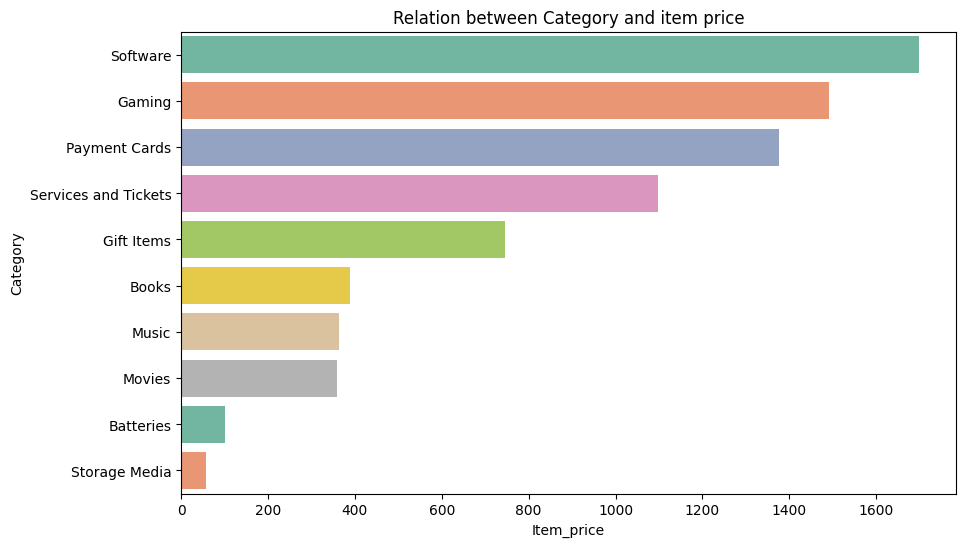

In [33]:
# Group by season and cluster, then sum item_cnt_day
cluster_vs_sales = data.groupby('cluster')['item_price'].mean().reset_index()

# Convert 'season' to a categorical type with the defined order
cluster_vs_sales = cluster_vs_sales.sort_values('item_price', ascending= False)

# Plotting total sales per season by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_vs_sales, y='cluster', x='item_price', palette='Set2')
plt.title('Relation between Category and item price')
plt.ylabel('Category')
plt.xlabel('Item_price')

plt.show()

>***This graph represent relation between CLuster and their value , 
For further analyzation relation between item price and value of them will be checked in next cells .***

In [34]:
from scipy.stats import pearsonr

def check_price_sales_correlation(data, frequency='M'):
    """
    Checks the correlation between item price and amount of items sold.

    Parameters:
    - data: DataFrame containing sales data with 'date', 'item_cnt_day', and 'item_price'.
    - frequency: Resampling frequency ('D' for daily, 'W' for weekly, 'M' for monthly, etc.).
    """
    # Ensure 'date' is in datetime format
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

    # Group by the specified frequency and calculate total sales and average price
    aggregated_data = data.resample(frequency, on='date').agg({
        'item_cnt_day': 'sum',  # Total items sold
        'item_price': 'mean'     # Average item price
    }).reset_index()

    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(aggregated_data['item_price'], aggregated_data['item_cnt_day'])

    return aggregated_data ,correlation



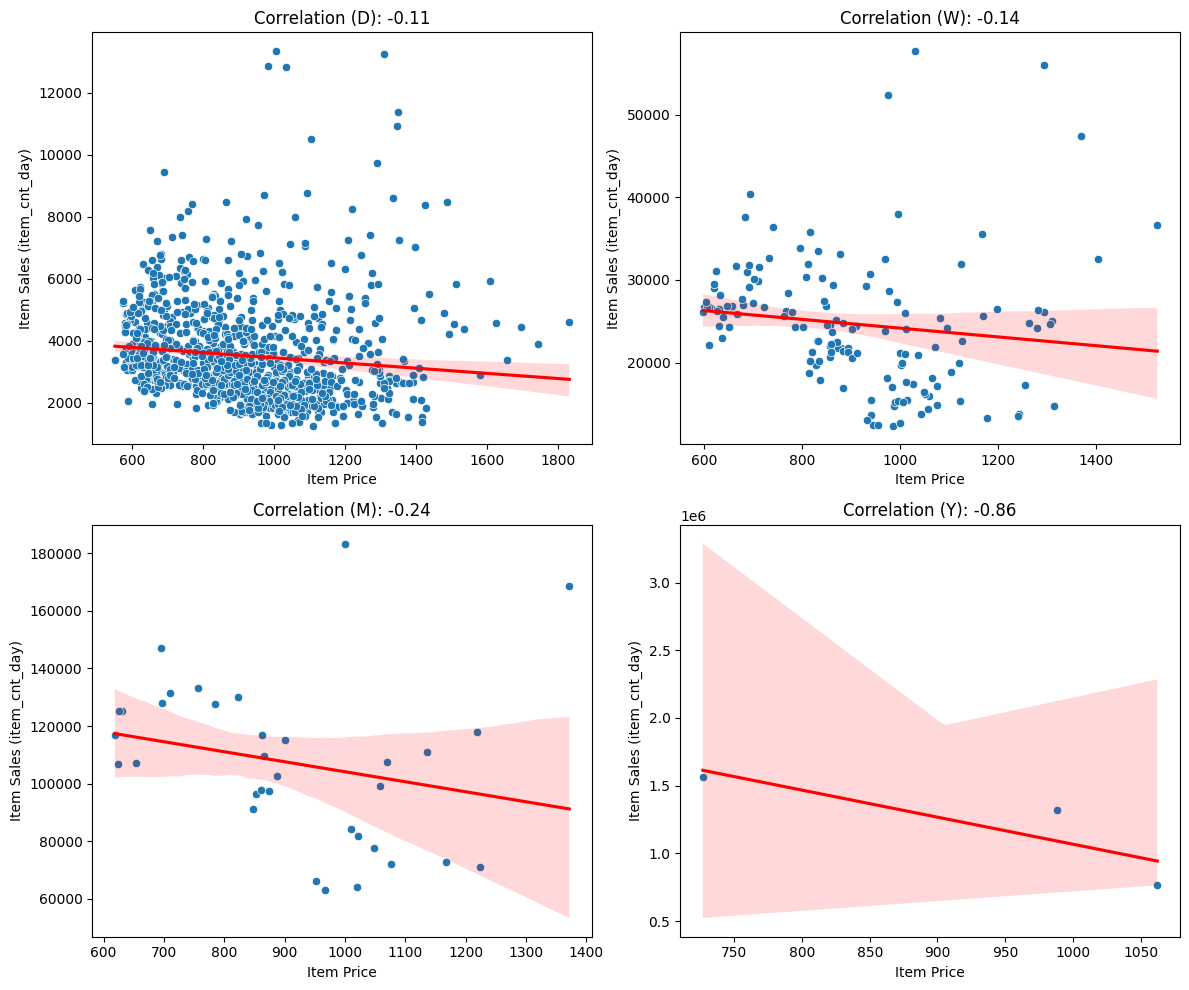

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
frequencies = ['D', 'W', 'M', 'Y']
correlations = []

# Iterate over frequencies and plot
for ax, freq in zip(axs.flat, frequencies):
    resampled_data, correlation  = check_price_sales_correlation(data, frequency=freq)
    correlations.append(correlation)
    
    # Plotting the scatter plot
    sns.scatterplot(data=resampled_data, x='item_price', y='item_cnt_day', ax=ax, palette='Set2')
    sns.regplot(data=resampled_data, x='item_price', y='item_cnt_day', scatter=False, ax=ax, color='red')
    
    # Display correlation on the plot
    ax.set_title(f'Correlation ({freq}): {correlation:.2f}')
    ax.set_xlabel('Item Price')
    ax.set_ylabel('Item Sales (item_cnt_day)')

# Adjust layout
plt.tight_layout()
plt.show()


>***As observed, there is a negative correlation between item price and the quantity of items sold. Furthermore, as the time interval increases, this effect becomes more pronounced.***